In [4]:
# 문장토큰화  sent_tokenize
# 기본로직
    # 마침표,느낌표, 물음표를 문장 끝 후보로 인식
    # 약어 패턴 학습(Dr, Mr ,U.S.A 등)
    # 대문자로 시작하는지
    # 통계적 모델을 사용해 진짜 문장 경계인지 판단
# 다국어
# 약어와 실제 문장끝을 구분하는 기계학습 모델 내장

# 단어 토큰화 word_tokenization
    # 규칙기반
    # 공백기준 단어분리
    # 구두점을 별도 토큰으로 분리
    # 축약형 처리 it's  it, s
    # 소유격 처리 "Let's"  Let s

    #구두점기반  WordPunctTokenizer
    # 모든 구두점을 분리
    # It's  It, ', s

    # 정규표현식  RegexpTokenizer

# 노이즈와 불용어 제거 
    # set자료구조 : 중복제거
    # List Comprehension : 필터링
    # NLTK 불용어사전


In [5]:
%conda install nltk

3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [6]:
from nltk.tokenize import sent_tokenize
import nltk

In [7]:
nltk.download('wordnet')
nltk.download('webtext')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
sentence = "Hello everyone. It's good to see you. Let's start our text mining class"
sent_tokenize(sentence)

['Hello everyone.',
 "It's good to see you.",
 "Let's start our text mining class"]

In [9]:
sentence_kor = '안녕하세요, 여러분. 만나서 반갑습니다. 이제 학습을 시작해 볼까요?'
sent_tokenize(sentence_kor)

['안녕하세요, 여러분.', '만나서 반갑습니다.', '이제 학습을 시작해 볼까요?']

In [10]:
from nltk.tokenize import word_tokenize
word_tokenize(sentence_kor)

['안녕하세요', ',', '여러분', '.', '만나서', '반갑습니다', '.', '이제', '학습을', '시작해', '볼까요', '?']

In [11]:
from nltk.tokenize import WordPunctTokenizer
WordPunctTokenizer().tokenize(sentence)

['Hello',
 'everyone',
 '.',
 'It',
 "'",
 's',
 'good',
 'to',
 'see',
 'you',
 '.',
 'Let',
 "'",
 's',
 'start',
 'our',
 'text',
 'mining',
 'class']

In [12]:
# 정규식토큰화
import re
re.findall("[abc]", "how ard you, boy")

['a', 'b']

In [13]:
# 노이즈와 불용어 제거
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
english_stops = stopwords.words('english')
test1 = "Sorry, I couldn't go to movie yesterday"
# tokens = word_tokenize(test1)
tokenizer = RegexpTokenizer("[\\w']+")
tokens = tokenizer.tokenize(test1.lower())

[token for token in tokens if token not in english_stops  ]

['sorry', 'go', 'movie', 'yesterday']

In [14]:
# 소문자 a~z로 이루어진 문자열에서 4글자이상
RegexpTokenizer("[a-z]{4,}")

RegexpTokenizer("[\\w']{3,}")  # 3글자 이상


RegexpTokenizer("[\\w]")  # 어포스트로피를 패턴에서 제외   can't   can t


RegexpTokenizer(pattern='[\\w]', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [15]:
# 어간 추출(Stemming)
# 줄기 stem   단어에서 불필요한 요소를 제거하고 남는 핵심형태
# 단어는 다양한 형태... 복수형 과거형 과 같은 시제변환, 복수형
# 단어를 통일
    # walk(걷다)   walks walking walked  -->어간 walk
    # 먹는다, 사랑해, 책을 
    #  먹는다 먹었다... '먹-'으로 묶어서 컴퓨터가 같은 단어로 인식  

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks')

('cook', 'cookeri', 'cookbook')

In [16]:
# PorterStemmer 규칙기반이라서 완벽하지 못함 --> 속도가 빠름, 의미가 달라질수 도 있음

In [17]:
from nltk.stem import LancasterStemmer  # 더 많은 규칙이 적용.. 과도한 축약 위험
stemmer = LancasterStemmer()
stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks')

('cook', 'cookery', 'cookbook')

In [18]:
# 표제어 추출  Lemmatization
# Lemma  단어의 사전 기본형
# 단어의 변형(시제,복수,비교급) 제거하고 사전(headword)에 나오는 정확한 원형으로 바꾸는 과정
# 어간처럼 단어줄기가 아니라 , 맥락과 품사를 고려한 올바른 형태
# better(더 좋은) ->표제어  good(좋은)
# 먹었다 --> 먹다(동사 원형)
# 알고리즘 : 형태소 분석기(konlpy) 를 사용해 품사(명사,동사)를 보고 정확히 변환 

In [19]:
# 주요목적
    # 어간추출처럼 대충 줄이지 않고 맥락에 맞는 정확한 단어로 만들어서 NLP 품질 향상
    # 단점  사전에 의존해서 언어/맥락 제한


In [20]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print( lemmatizer.lemmatize('cooking'))  # 기본이 명사로 인식
print(lemmatizer.lemmatize('cooking',pos='v'))  # 품사를 동사(v)

cooking
cook


In [21]:
# n  noun(명사)  -->기본
# v  verb(동사)
# a  adjective(형용사)
# r  averb (부사)

In [22]:
lemmatizer.lemmatize('better', pos='a')

'good'

In [23]:
# 품사 태깅
import nltk
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger_eng')

tokens = "hello everyone. It's good to see you. Let's start out text mining calss!"
tokens = word_tokenize(tokens)
nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('hello', 'NN'),
 ('everyone', 'NN'),
 ('.', '.'),
 ('It', 'PRP'),
 ("'s", 'VBZ'),
 ('good', 'JJ'),
 ('to', 'TO'),
 ('see', 'VB'),
 ('you', 'PRP'),
 ('.', '.'),
 ('Let', 'VB'),
 ("'s", 'POS'),
 ('start', 'VB'),
 ('out', 'RP'),
 ('text', 'NN'),
 ('mining', 'NN'),
 ('calss', 'NN'),
 ('!', '.')]

In [24]:
# 품사 태그 정보 확인
# nltk.download('tagsets_json')
nltk.help.upenn_tagset('NN')  # 명사 동사 형용사   NN VB JJ  

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [25]:
# 특정 품사 추출   명사 동사 형용사
tag_lists = ['NN','VB','JJ']
[word for word,tag in nltk.pos_tag(tokens) if tag in tag_lists]

['hello', 'everyone', 'good', 'see', 'Let', 'start', 'text', 'mining', 'calss']

In [26]:
# NLTK는 영어기반  한국어의 조사분리 불가능, 어미변화처리 불가능
# KoNlpy Okt 사용 해결

setx JAVA_HOME "C:\Users\playdata2\Downloads\openjdk-25.0.1_windows-x64_bin\jdk-25.0.1"

setx PATH "%PATH%;%JAVA_HOME%\bin"

In [27]:
%pip install JPype1

# 컴퓨터 재부팅

Note: you may need to restart the kernel to use updated packages.


In [29]:
sentence = '''절망의 반대가 희망은 아니다.
어두운 밤하늘에 별이 빛나듯
희망은 절망 속에 싹트는 거지
만약에 우리가 희망함이 적다면
그 누가 세상을 비출어줄까.
정희성, 희망 공부'''
tokens = word_tokenize(sentence)
print(tokens)
print(nltk.pos_tag(tokens))

['절망의', '반대가', '희망은', '아니다', '.', '어두운', '밤하늘에', '별이', '빛나듯', '희망은', '절망', '속에', '싹트는', '거지', '만약에', '우리가', '희망함이', '적다면', '그', '누가', '세상을', '비출어줄까', '.', '정희성', ',', '희망', '공부']
[('절망의', 'JJ'), ('반대가', 'NNP'), ('희망은', 'NNP'), ('아니다', 'NNP'), ('.', '.'), ('어두운', 'VB'), ('밤하늘에', 'JJ'), ('별이', 'NNP'), ('빛나듯', 'NNP'), ('희망은', 'NNP'), ('절망', 'NNP'), ('속에', 'NNP'), ('싹트는', 'NNP'), ('거지', 'NNP'), ('만약에', 'NNP'), ('우리가', 'NNP'), ('희망함이', 'NNP'), ('적다면', 'NNP'), ('그', 'NNP'), ('누가', 'NNP'), ('세상을', 'NNP'), ('비출어줄까', 'NNP'), ('.', '.'), ('정희성', 'NN'), (',', ','), ('희망', 'NNP'), ('공부', 'NNP')]


In [32]:
# NNP 고유명사... 대부분 고유명사로 잘못 인식
from konlpy.tag import Okt
t = Okt()
print(f'형태소 : {t.morphs(sentence)}')
print(f'명사 : {t.nouns(sentence)}')
print(f'품사태깅 : {t.pos(sentence)}')

형태소 : ['절망', '의', '반대', '가', '희망', '은', '아니다', '.', '\n', '어', '두운', '밤하늘', '에', '별', '이', '빛나듯', '\n', '희망', '은', '절망', '속', '에', '싹트는', '거지', '\n', '만약', '에', '우리', '가', '희망', '함', '이', '적다면', '\n', '그', '누가', '세상', '을', '비출어줄까', '.', '\n', '정희성', ',', '희망', '공부']
명사 : ['절망', '반대', '희망', '어', '두운', '밤하늘', '별', '희망', '절망', '속', '거지', '만약', '우리', '희망', '함', '그', '누가', '세상', '정희성', '희망', '공부']
품사태깅 : [('절망', 'Noun'), ('의', 'Josa'), ('반대', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('은', 'Josa'), ('아니다', 'Adjective'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('어', 'Noun'), ('두운', 'Noun'), ('밤하늘', 'Noun'), ('에', 'Josa'), ('별', 'Noun'), ('이', 'Josa'), ('빛나듯', 'Verb'), ('\n', 'Foreign'), ('희망', 'Noun'), ('은', 'Josa'), ('절망', 'Noun'), ('속', 'Noun'), ('에', 'Josa'), ('싹트는', 'Verb'), ('거지', 'Noun'), ('\n', 'Foreign'), ('만약', 'Noun'), ('에', 'Josa'), ('우리', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('함', 'Noun'), ('이', 'Josa'), ('적다면', 'Verb'), ('\n', 'Foreign'), ('그', 'Noun'), ('누가', 'Noun'), ('세상', 

In [ ]:
# 그래프와 워드클라우드

# 1. 데이터 로딩
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg  # 쿠텐버그 말뭉치중에서 이상한나라의 엘리스 텍스트 로드
gutenberg.fileids()
doc_alice =  gutenberg.open('carroll-alice.txt').read()
print(doc_alice)

In [ ]:
# 2. 토큰화 및 전처리
from nltk.tokenize import word_tokenize
tokens_alice = word_tokenize(doc_alice)
print(len(tokens_alice))

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\\w']{3,}")
reg_alice = tokenizer.tokenize(doc_alice.lower())
print(len(reg_alice))

33535
21616


In [ ]:
# 3. 불용어 제거
from nltk.corpus import stopwords
english_stops =  set(stopwords.words('english'))
result_alice = [ word for word in reg_alice if word not in english_stops  ]
len(result_alice)

12871

In [50]:
# 4. 품사 태깅 및 필터링 (명사 동사 형용사만)
my_tag_set = ['NN','VB','VBD','JJ']
my_word = [word for word, tag in nltk.pos_tag(reg_alice) if tag in my_tag_set]

In [55]:
from collections import Counter
sorted_word_count = dict( Counter(my_word) )

In [56]:
%conda install wordcloud

3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

## Package Plan ##

  environment location: c:\Users\playdata2\miniconda3\envs\LLM

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    contourpy-1.3.1            |  py313h214f63a_0         234 KB
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    fonttools-4.60.1           |  py313h02ab6af_0         3.6 MB
    freetype-2.13.3            |       h0620614_0         554 KB
    intel-openmp-2025.0.0      |    haa95532_1164         2.1 MB
    jpeg-9f                    |       ha349fce_0         302 KB
    kiwisolver-1.4.8           |  py313h5da7b33_0          63 KB
    lcms2-2.16                 |       hb4a4139_0         566 KB
    lerc-3.0                   |       hd7

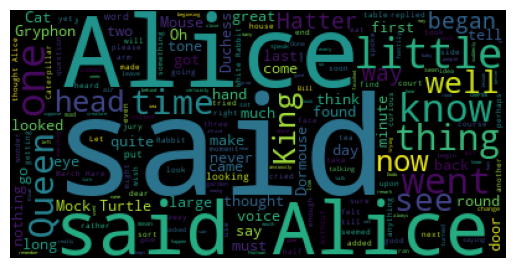

In [58]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud().generate(doc_alice)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

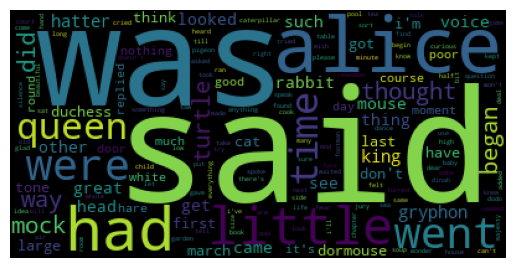

In [62]:
wc = wordcloud.generate_from_frequencies(sorted_word_count)
plt.axis('off')
plt.imshow(wc)
plt.show()

카운트기반 문서표현 방법  Bag of Words, TF-IDF

In [63]:
# 영화 리뷰 데이터셋 로드
import nltk
nltk.download("movie_reviews")
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
# 데이터셋 구조 확인
from nltk.corpus import movie_reviews
print(f'review count : {len(movie_reviews.fileids())}')
print(f'categories of reviews : {movie_reviews.categories()}')

review count : 2000
categories of reviews : ['neg', 'pos']


In [ ]:
#BOW 카운트 백터 생성
# 수동 구현
documents =  [movie_reviews.words(fileid) for fileid in  movie_reviews.fileids()]

In [77]:
# 단어 빈도 계산
word_count = {}
for text in documents:
    for word in text:
        word_count[word] = word_count.get(word,0) + 1 
sorted_features = sorted(word_count, key=word_count.get,reverse=True)

In [79]:
# 전처리 및 재계산
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
tokenizer = RegexpTokenizer("[\\w']{3,}")
english_stops = set(stopwords.words('english'))
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
tokens = [ [token for token in tokenizer.tokenize(doc) if token not in english_stops] for doc in documents ]

In [83]:
word_count = {}
for text in tokens:
    for word in text:
        word_count[word] = word_count.get(word,0) + 1
sorted_featrues = sorted(word_count, key=word_count.get, reverse=True)        
for word in sorted_featrues[:10]:
    print(f"{word} : {word_count[word]}")

film : 8935
one : 5791
movie : 5538
like : 3690
even : 2564
time : 2409
good : 2407
story : 2136
would : 2084
much : 2049


In [ ]:
%conda install scikit-learn

In [87]:
# CountVectorizer 문서를 벡터화
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(vocabulary=sorted_featrues)
cv

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"
,analyzer,'word'


In [88]:
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
reviews[0]

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe